# ANN for make simulation and make prediction in physics

# import working liberary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.layers import InputNormalization
from keras.optimizers import RMSprop
from openpyxl import Workbook
import openpyxl
from keras.models import load_model
import numpy as np
#from keras.utils import multi_gpu_model


# test GPU

In [12]:
import tensorflow as tf
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
#sess = tf.Session(config=tf.ConfigProto(device_count={'GPU': 1}))
#print(sess)
#print(config=tf.ConfigProto(device_count={'GPU': 1}))
print('ending')

Num GPUs: 0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
ending


# global variables

In [615]:
# input variable to program
inputFile = 'datasets/collect data_pi-modified.xlsx'
inputSheetName = 'main'
outputFile = 'out_in3.xlsx'
outputSheetName = 'predicat_in3'
nameFigImg = 'fig_in3.png'


# read data

In [616]:
# Read the data from the CSV file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra data of fiting
#X = data.drop('massno', axis=1) #static input for each case : extra data of fiting
#X = data.drop('output', axis=1)

X = data.drop('Spectrum', axis=1)
X = X.drop('err1', axis=1)
X = X.drop('err2', axis=1)
#X = data['Pt']
y = data['Spectrum']

# loada saved model

In [617]:

# Load the saved model
#model = load_model('NegPion_L9.h5')

# define the model

In [618]:

# Define the model

model = Sequential()

# Normalize the input
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# Add the first dense layer
model.add(Dense(30, input_dim=3, activation='relu'))
# Add batch normalization
model.add(BatchNormalization())

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(60, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(30, activation='relu'))
# Add batch normalization
model.add(BatchNormalization())

# Add the output layer
model.add(Dense(1))
# Add the output layer
#model.add(Dense(1, activation='softmax'))


# compile the model

In [619]:
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)
#model.compile(loss='mse', optimizer='adam')
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train the model

In [620]:
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=100, batch_size=16)


Epoch 1/100
72/72 [==============================] - 2s 2ms/step - loss: 576.0764
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 465.8019
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 403.4930
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 335.6790
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 293.9521
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 265.8827
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 209.7652
Epoch 8/100
72/72 [==============================] - 0s 3ms/step - loss: 230.3725
Epoch 9/100
72/72 [==============================] - 0s 3ms/step - loss: 211.0768
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 218.1404
Epoch 11/100
72/72 [==============================] - 0s 2ms/step - loss: 172.4192
Epoch 12/100
72/72 [==============================] - 0s 2ms/step - loss: 202.3724
Epoch 13/100


# Evaluate the model

In [621]:
# Evaluate the model
#score = model.evaluate(X_train, y)
#loss, accuracy = model.evaluate(X_train, y)
score = model.evaluate(X_train, y)
print("score ")
print(score)
#print("accuracy")
#print(accuracy)

36/36 [==============================] - 0s 2ms/step - loss: 43.8109
score 
43.8109130859375


# save current compiled model

In [622]:
# Save the model
model.save('NegPion_L9_test-9-5-2023-500-9L-out-noactivation.h5')

# make prediction

In [623]:
# Make predictions on new data
#new_data = pd.read_csv('data_pion_20.csv').drop('output', axis=1)
#new_data = X
#X_test = X.to_numpy() 
X_test = scaler.transform(X)
#predictions = model.predict(new_data)
#new_data = new_data.drop('Spectrum', axis=1)

#newX = new_data['Pt']
#newX = X_test

print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
print("predictions is : ")
print(predictions)


new_data is : 
[[-1.20025974  1.76775955 -1.2954544 ]
 [-1.20025974  1.76775955 -1.19448258]
 [-1.20025974  1.76775955 -1.09351077]
 ...
 [ 1.59422635 -1.17477116  1.68321423]
 [ 1.59422635 -1.17477116  1.88515787]
 [ 1.59422635 -1.17477116  2.0871015 ]]
36/36 [==============================] - 0s 1ms/step
predictions is : 
[[93.29916  ]
 [78.2599   ]
 [61.292286 ]
 ...
 [ 1.0590444]
 [ 0.9370663]
 [ 0.5205847]]


# draw 

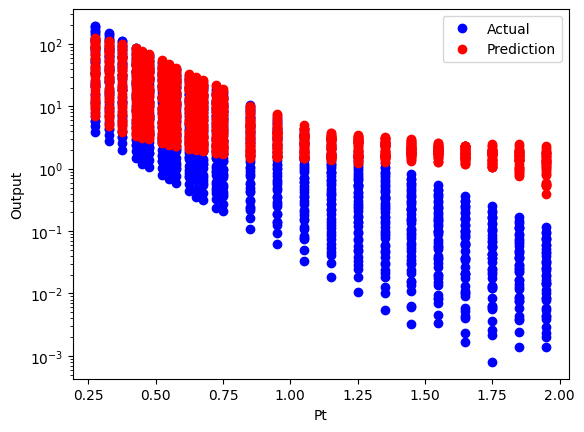

<Figure size 640x480 with 0 Axes>

In [624]:

# for drawing in 2d i choose Pt as x-axis

#x1 = X[X['s']==7.7]
#x2 = x1[x1['N part']==337]
#xg = x2['Pt'].values
#xg = X_test[:,2:3]
xg = X['Pt']


# Plot the data and predictions
plt.semilogy(xg,  y,'bo', label='Actual')
plt.semilogy(xg, predictions,'ro', label='Prediction')

#plt.scatter(xg, y)
#plt.scatter(xg, predictions)

#plt.plot(xg, y, 'bo', label='Actual')
#plt.plot(xg, predictions, 'ro', label='Predicted')
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend()

plt.show()
plt.savefig(nameFigImg)

# draw 3d

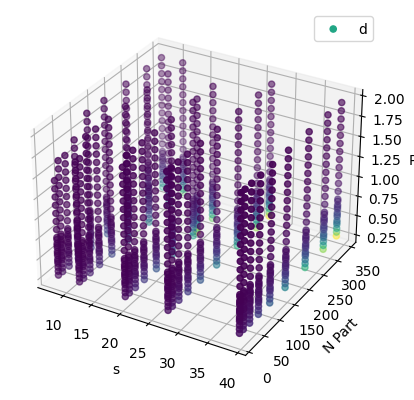

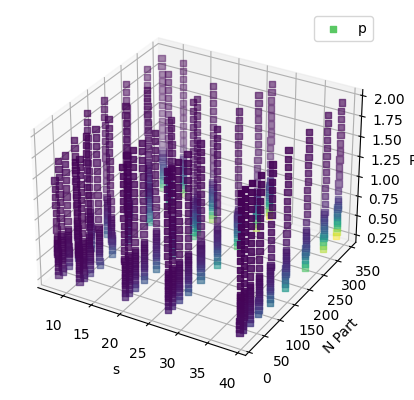

In [625]:
# for drawing in 4d i choose Pt as x-axis

#x1 = X[X['s']==7.7]
#x2 = x1[x1['N part']==337]
#xg = x2['Pt'].values
#xg = X_test[:,2:3]
x = X['s']
yy = X['N part']
z = X['Pt']
d = y
p = predictions


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, yy, z, c=d)
#imgd = ax.scatter(x, y, z, c=d)
#fig.colorbar(imgd)
ax1.set_xlabel('s')
ax1.set_ylabel('N Part')
ax1.set_zlabel('Pt')
ax1.legend(['d'])
plt.show()

#imgp = ax.scatter(x, y, z, c=p, marker='s')
#fig.colorbar(imgp)

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(x, yy, z, c=p, marker='s')
ax2.set_xlabel('s')
ax2.set_ylabel('N Part')
ax2.set_zlabel('Pt')
ax2.legend(['p'])
plt.show()

# write output to excel 

In [626]:

# Write predictions and plot data to Excel file
#output = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten()})
#outputpredicat = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
error = np.array(y) - np.array(predictions.flatten())

#outdataDict = {'Actual': y.values.flatten(), 'Predicted': predictions.flatten(),'Error': error.flatten() }
#outputpredicat = pd.DataFrame({ 'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
#print(outdataDict)
outputpredicat = pd.DataFrame({'Actual': y.values.flatten(), 'Predicted': predictions.flatten(),'Error': error.flatten()})
# output is data frame
print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


     Actual  Predicted      Error
0  114.8980  93.299156  21.598844
1   83.9507  78.259903   5.690797
2   62.4481  61.292286   1.155814
3   46.3708  45.366333   1.004467
4   34.7823  36.193951  -1.411651
5   26.3221  30.884296  -4.562196
6   19.7093  24.943361  -5.234061
7   15.0548  20.972208  -5.917408
8   11.2735  17.782097  -6.508597
9    8.7656  12.239578  -3.473978


# print model summery 

In [627]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
print(model.summary())

End
score 43.8109130859375
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_367 (Dense)           (None, 30)                120       
                                                                 
 batch_normalization_71 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_368 (Dense)           (None, 30)                930       
                                                                 
 batch_normalization_72 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_369 (Dense)           (None, 60)                1860      
                                                                 
 dense_370 (Dense)        